In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import plotly.express as px
from rdkit import Chem
from rdkit.Chem import Descriptors
import pickle
from scipy import stats

In [2]:
# Nature-style rcParams
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 8,
    'axes.linewidth': 0.5,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 3,
    'ytick.major.size': 3,
    'xtick.minor.size': 1.5,
    'ytick.minor.size': 1.5,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'axes.spines.top': False,
    'axes.spines.right': False,
})

In [3]:
bdb = pd.read_csv("../results/FinalBDBPred.csv")

In [4]:
bdb_smiles = bdb["Ligand SMILES"].tolist()
bdb_classes = bdb["Sub_Class"].tolist()
bdb_types = set(bdb_classes)
bdb_class_to_indices = {x:list() for x in bdb_types}
for i, val in enumerate(bdb_classes):
    bdb_class_to_indices[val].append(i)

In [5]:
molar_masses = []
mols = []
for smiles in bdb_smiles:
    mol = Chem.MolFromSmiles(smiles)
    mols.append(mol)
    if mol is None:
        molar_masses.append(None)
    else:
        molar_mass = Descriptors.MolWt(mol)
        molar_masses.append(molar_mass)

In [6]:
class_of_interest = "CA12"
data = []
for i in range(len(bdb_smiles)):
    print(i)
    if molar_masses[i] is None:
        continue
    data.append([molar_masses[i], bdb[class_of_interest][i]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
len(data)

33099

In [8]:
train = [1958, 1963, 1964, 1967, 1971, 1979, 1987, 1991, 1996, 1997, 2010, 2011, 2021, 2024, 2030, 2040, 2044, 2051, 2059, 2066, 2075, 2077, 2078, 2090, 2093, 2104, 2105, 2111, 2126, 2127, 2135, 2138, 2141, 2142, 2148, 2155, 2163, 2164, 2170, 2179, 2183, 2185, 2205, 2208, 2209, 2213, 2215, 2222, 2223, 2224]

In [9]:
data_of_interest = [data[i] for i in range(len(data)) if bdb_classes[i] == class_of_interest and i not in train]

In [10]:
smiles_of_interest = [bdb_smiles[i] for i in range(len(bdb_classes)) if (molar_masses[i] is not None and bdb_classes[i] == class_of_interest)]

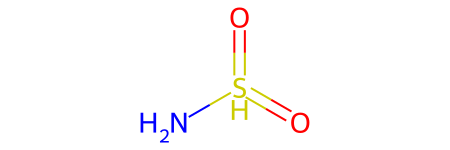

In [11]:
substructure_of_interest = Chem.MolFromSmiles("NS(=O)(=O)")
substructure_of_interest

In [12]:
has_substructure = []
for smiles in bdb_smiles:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        has_substructure.append(len(mol.GetSubstructMatch(substructure_of_interest)) != 0)

In [13]:
has_substructure_of_interest = [has_substructure[i] for i in range(len(data)) if bdb_classes[i] == class_of_interest and i not in train]

In [14]:
data_of_interest

[[397.28100000000006, 0.75269705],
 [504.0150000000002, 0.015882855],
 [477.5030000000002, 0.7172085],
 [476.5800000000002, 0.017404629],
 [407.52000000000004, 0.2280676],
 [335.385, 0.99238783],
 [430.4420000000002, 0.020397501],
 [367.83900000000006, 0.48426273],
 [307.75800000000004, 0.13244769],
 [337.39400000000006, 0.8738152],
 [345.207, 0.9556221],
 [403.4630000000001, 0.04095248],
 [380.66200000000003, 0.9920645],
 [344.43600000000004, 0.88656867],
 [423.46900000000005, 0.002660444],
 [562.6190000000003, 0.9161335],
 [345.38000000000005, 0.87077415],
 [314.79799999999994, 0.91559684],
 [536.6180000000002, 0.079118624],
 [350.44000000000017, 0.87193763],
 [305.4230000000001, 0.7258658],
 [387.8270000000001, 0.98869413],
 [375.45400000000006, 0.9849208],
 [535.4780000000002, 0.98183125],
 [338.312, 0.44007716],
 [433.29600000000005, 0.9997135],
 [333.41300000000007, 0.5973879],
 [561.1750000000001, 0.03417125],
 [399.49700000000007, 0.015125809],
 [383.5170000000001, 0.9935029],


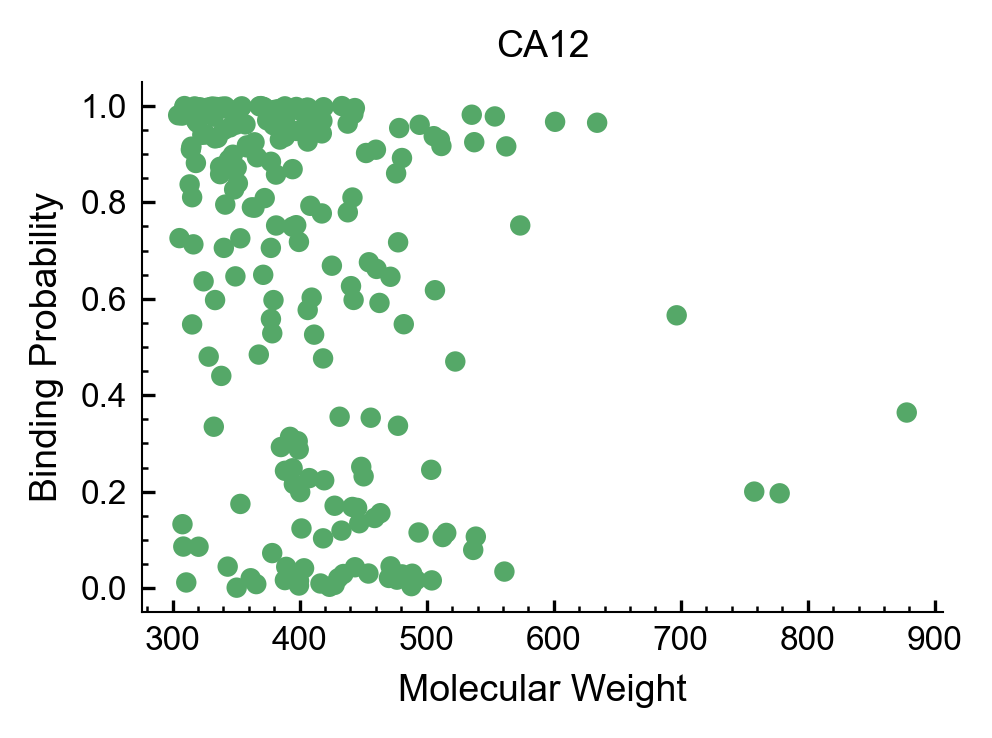

In [15]:
# Set figure size to single column width (inches)
fig, ax = plt.subplots(figsize=(3.35, 2.5))

# Scatter plot with Nature-style marker
ax.scatter([x[0] for x in data_of_interest], [x[1] for x in data_of_interest], 
           s=24, c='#55A868', edgecolors='none', zorder=2)

# Axis labels
ax.set_xlabel("Molecular Weight", labelpad=4)
ax.set_ylabel("Binding Probability", labelpad=4)
ax.set_title("CA12")
# Minor ticks
ax.minorticks_on()

# Remove top/right spines (redundant with rcParams, but explicit here)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout for better spacing
plt.tight_layout()

# Show or save the figure
plt.show()

In [16]:
len(data_of_interest)

221

In [17]:
pos = [data_of_interest[i][1] for i in range(len(data_of_interest)) if has_substructure_of_interest[i]]
neg = [data_of_interest[i][1] for i in range(len(data_of_interest)) if not has_substructure_of_interest[i]]

In [18]:
sum(pos)/len(pos) - sum(neg)/len(neg)

0.16541417964872052

In [19]:
from scipy import stats
stats.mannwhitneyu(pos, neg, alternative='greater')

MannwhitneyuResult(statistic=2805.0, pvalue=0.015280591004336253)

In [15]:
indices = bdb_class_to_indices["CA12"]

In [16]:
testindices = [i for i in indices if i not in train]

In [17]:
bdb_smiles[2216]

'Cc1nn(-c2ccccc2)c2c1c(=O)oc1cc(Cl)ccc21'

In [18]:
sorted([(testindices[i], data_of_interest[i]) for i in range(len(testindices))], key=lambda x:x[1][0])

[(2085, [304.3710000000001, 0.98076254]),
 (1980, [305.4230000000001, 0.7258658]),
 (2207, [307.356, 0.9800431]),
 (1965, [307.75800000000004, 0.13244769]),
 (2197, [308.3590000000001, 0.98820233]),
 (2154, [308.4070000000001, 0.08606267]),
 (2047, [309.322, 0.99976987]),
 (2018, [309.34299999999996, 0.99796087]),
 (2216, [310.73999999999995, 0.011595736]),
 (2097, [311.359, 0.99346924]),
 (2056, [313.382, 0.837271]),
 (2145, [314.366, 0.909531]),
 (1976, [314.79799999999994, 0.91559684]),
 (2029, [315.354, 0.810703]),
 (2188, [315.354, 0.5468802]),
 (2089, [316.33400000000006, 0.7129543]),
 (2043, [317.32599999999996, 0.99905896]),
 (2121, [318.307, 0.96977204]),
 (2184, [318.314, 0.88172644]),
 (2016, [319.35000000000014, 0.96521544]),
 (2217, [320.3740000000001, 0.9730645]),
 (2160, [320.39900000000006, 0.08572558]),
 (2189, [321.22900000000004, 0.99739903]),
 (2055, [323.37000000000006, 0.94022185]),
 (2031, [324.0660000000001, 0.99556273]),
 (2187, [324.37600000000003, 0.6362505])

In [20]:
embeddings = np.load("../BindingDB/heavy_bdb_embed.npy").tolist()

In [21]:
with open("../fragment-embedding/CA12_subs.pickle", 'rb') as file:
    modembeddings = pickle.load(file)

In [5]:
smallembeddings = np.load("../fragment-embedding/new_small_embeddings.npy")

In [22]:
with open("CA12.pkl", 'rb') as file:
    mdl = pickle.load(file)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [7]:
mdl.predict(smallembeddings)

array([0.9750977 , 0.9192272 , 0.97319305, 0.9365451 , 0.70412844,
       0.91920286, 0.6511628 , 0.8341503 , 0.6150229 , 0.64961153],
      dtype=float32)

In [21]:
import random

In [22]:
indices = [i for i in range(len(bdb_classes)) if bdb_classes[i] == "CA12"]

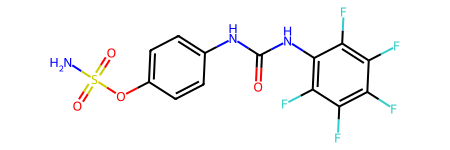

In [23]:
mol = mols[indices[0]]
mol

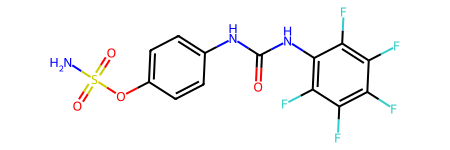

In [24]:
newmol = Chem.MolFromSmiles(smiles_of_interest[0])
newmol

In [23]:
indices_of_interest = [i for i in range(len(bdb_classes)) if bdb_classes[i] == "CA12"]

In [24]:
len(indices_of_interest)

271

In [25]:
ca12subembeddings = modembeddings

In [26]:
ca12embeddings = [embeddings[i] for i in range(len(embeddings)) if i in indices_of_interest]

In [27]:
[len(x) if x is not None else None for x in modembeddings]

[9,
 6,
 9,
 7,
 9,
 3,
 6,
 9,
 6,
 7,
 9,
 4,
 7,
 7,
 6,
 5,
 7,
 6,
 4,
 6,
 13,
 5,
 5,
 10,
 5,
 3,
 2,
 9,
 7,
 9,
 7,
 6,
 5,
 7,
 6,
 5,
 6,
 6,
 5,
 7,
 8,
 7,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 7,
 4,
 8,
 8,
 6,
 4,
 6,
 5,
 7,
 6,
 8,
 7,
 6,
 4,
 9,
 4,
 4,
 10,
 6,
 9,
 5,
 5,
 7,
 6,
 4,
 9,
 6,
 7,
 4,
 8,
 9,
 6,
 7,
 7,
 6,
 8,
 8,
 6,
 5,
 6,
 6,
 9,
 6,
 6,
 5,
 7,
 5,
 5,
 7,
 7,
 4,
 3,
 8,
 7,
 10,
 8,
 6,
 7,
 3,
 8,
 7,
 6,
 7,
 8,
 9,
 11,
 8,
 7,
 6,
 5,
 5,
 5,
 4,
 7,
 6,
 5,
 6,
 6,
 7,
 5,
 4,
 5,
 7,
 8,
 4,
 5,
 7,
 6,
 3,
 2,
 8,
 5,
 5,
 9,
 7,
 7,
 9,
 9,
 9,
 6,
 6,
 5,
 10,
 8,
 6,
 4,
 6,
 9,
 6,
 7,
 4,
 10,
 4,
 3,
 6,
 22,
 7,
 10,
 8,
 6,
 7,
 5,
 5,
 11,
 11,
 8,
 10,
 6,
 5,
 7,
 7,
 8,
 6,
 3,
 3,
 10,
 10,
 5,
 7,
 9,
 3,
 6,
 8,
 4,
 4,
 7,
 5,
 5,
 6,
 4,
 5,
 6,
 10,
 13,
 5,
 4,
 7,
 7,
 8,
 2,
 6,
 5,
 9,
 7,
 9,
 3,
 6,
 4,
 7,
 9,
 6,
 7,
 5,
 6,
 5,
 10,
 6,
 5,
 4,
 5,
 4,
 4,
 3,
 4,
 4,
 7,
 2,
 7,
 7,
 11,
 6,
 7,
 4,
 5,
 3

In [28]:
totalca12subembeddings = []
for i in ca12subembeddings:
    if i is not None:
        for j in i:
            totalca12subembeddings.append(j)

In [29]:
original_predictions = mdl.predict(ca12embeddings)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
total_sub_predictions = mdl.predict(totalca12subembeddings)

KeyboardInterrupt: 

In [32]:
mdl.predict(smallembeddings)

NameError: name 'mdl' is not defined

In [ ]:
lens = [len(i) if i is not None else 0 for i in ca12subembeddings]
sub_predictions = []
count = 0
for l in lens:
    t = []
    for j in range(l):
        t.append(total_sub_predictions[count])
        count += 1
    sub_predictions.append(t)

In [ ]:
avg_sub_predictions = [sum(i)/len(i) for i in sub_predictions if i]

In [ ]:
avg_sub_predictions

[0.3590457969241672,
 0.1365659994383653,
 0.3989897867043813,
 0.06065016772065844,
 0.9127522309621176,
 0.4878571331501007,
 0.9313692351182302,
 0.8382687568664551,
 0.8037659327189127,
 0.44627199854169575,
 0.697865323887931,
 0.6274771988391876,
 0.43376157539231436,
 0.8379674298422677,
 0.6509507745504379,
 0.7243486166000366,
 0.828375118119376,
 0.6068905641635259,
 0.6819697618484497,
 0.5874105195204417,
 0.8250812796445993,
 0.7155199170112609,
 0.9221222281455994,
 0.13603894263505936,
 0.7173381567001342,
 0.7621212601661682,
 0.41121073067188263,
 0.9707857966423035,
 0.6950891103063311,
 0.3669900662369198,
 0.3676681561129434,
 0.9619187712669373,
 0.8169658541679382,
 0.7369519131524223,
 0.13848072787125906,
 0.5243974387645721,
 0.5001774082581202,
 0.9388728539148966,
 0.6933966040611267,
 0.6407371248517718,
 0.8055685237050056,
 0.7730632764952523,
 0.7648584047953287,
 0.31756957471370695,
 0.3988112558921178,
 0.6921360294024149,
 0.7728504538536072,
 0.50196

In [ ]:
original_predictions

array([0.6490484 , 0.2433355 , 0.697481  , 0.14609776, 0.9783389 ,
       0.80182046, 0.9928128 , 0.96674883, 0.9510747 , 0.83511776,
       0.8925459 , 0.8514396 , 0.7895037 , 0.94806176, 0.88587993,
       0.9396943 , 0.86813754, 0.8353821 , 0.9404951 , 0.89639115,
       0.96402955, 0.97043604, 0.97062725, 0.20885265, 0.91584   ,
       0.96416646, 0.93917125, 0.9890469 , 0.95175314, 0.6636414 ,
       0.5913352 , 0.9962852 , 0.9869033 , 0.9138319 , 0.46136808,
       0.8755801 , 0.6150396 , 0.9792057 , 0.93357253, 0.9219369 ,
       0.9282584 , 0.9591207 , 0.9533537 , 0.7191326 , 0.70366514,
       0.94948894, 0.9122131 , 0.8406363 , 0.8396311 , 0.9224494 ,
       0.65107805, 0.45066902, 0.99411964, 0.5888286 , 0.60814357,
       0.9728442 , 0.47804648, 0.9940426 , 0.97254616, 0.98436886,
       0.9824167 , 0.98972565, 0.9838319 , 0.8655704 , 0.96640533,
       0.05710512, 0.88171536, 0.64892733, 0.41924447, 0.2586006 ,
       0.9678612 , 0.963383  , 0.91707975, 0.4075185 , 0.91802

In [ ]:
ca12_has_substructure = [has_substructure[i] for i in range(len(has_substructure)) if i in indices_of_interest]

In [ ]:
ca12_substructure_indices = [i for i in range(len(ca12_has_substructure)) if ca12_has_substructure[i]]

In [ ]:
len(ca12_substructure_indices)

231

In [ ]:
original_predictions_substructure = [original_predictions[i] for i in range(len(original_predictions)) if i in ca12_substructure_indices]

In [ ]:
sum(original_predictions_substructure)/len(original_predictions_substructure)

0.8422685220063507

In [ ]:
sum(set(original_predictions) - set(original_predictions_substructure))/(len(original_predictions)-len(original_predictions_substructure))

0.6945675232913345

In [62]:
data = [subchangedelta, otherchangedelta]
kernels = [stats.gaussian_kde(x) for x in data]
print("kernels")
densities = [kernels[i](data[i]) for i in range(len(data))]
maxes = [max(x) for x in densities]
spreads = [np.array([x/maxes[i] for x in densities[i]]) for i in range(len(data))]
labels=["Sulfonamide Substitution", "Other Substitution"]
fig, ax = plt.subplots(figsize=(3.35, 2.5))

# Boxplot with higher zorder
bp = ax.boxplot(
    data,
    labels=labels,
    showfliers=False,
    boxprops=dict(linewidth=0.8, color='black', zorder=3),
    whiskerprops=dict(linewidth=0.8, color='black', zorder=3),
    capprops=dict(linewidth=0.8, color='black', zorder=3),
    medianprops=dict(linewidth=1.2, color='black', zorder=3),
    widths=0.5
)

# Scatter points with lower zorder
point_colors = ['#1f77b4', '#d62728']
for i, group_data in enumerate(data):
    #x = np.random.normal(i+1, 0.06, size=len(group_data))
    x = np.random.normal(0, 0.1, size=len(group_data)) * spreads[i] + np.ones(len(group_data)) * (i+1)
    ax.scatter(
        x, group_data,
        color=point_colors[i % 2],
        alpha=1,
        s=10,
        edgecolors='none',
        zorder=2
    )

ax.set_ylabel("Binding Probability", labelpad=4)
ax.minorticks_on()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

NameError: name 'subchangedelta' is not defined

In [ ]:
sub_predictions

[[0.35101035,
  0.35204244,
  0.29258722,
  0.37457326,
  0.45466378,
  0.32717726,
  0.35441744,
  0.3672626,
  0.35767782],
 [0.2477501, 0.10478876, 0.13058335, 0.14291868, 0.06323275, 0.13012236],
 [0.5682883,
  0.3908825,
  0.6552356,
  0.2812362,
  0.43060392,
  0.4860787,
  0.4689603,
  0.1499909,
  0.15963165],
 [0.050072722,
  0.049047202,
  0.1378523,
  0.0593384,
  0.07679345,
  0.027955886,
  0.023491222],
 [0.84931487,
  0.93023324,
  0.89503485,
  0.9719896,
  0.8906588,
  0.9392368,
  0.94856787,
  0.8770999,
  0.9126342],
 [0.48391357, 0.4510857, 0.52857214],
 [0.86001694, 0.93973464, 0.946805, 0.9498779, 0.9649713, 0.9268096],
 [0.88653326,
  0.81684595,
  0.88946724,
  0.7181403,
  0.8042324,
  0.9059835,
  0.91140103,
  0.7690134,
  0.8428017],
 [0.7389321, 0.7543656, 0.7855123, 0.87352246, 0.93489033, 0.7353728],
 [0.36114883,
  0.41667637,
  0.39908025,
  0.3592349,
  0.4876394,
  0.6728229,
  0.42730135],
 [0.6719556,
  0.7832122,
  0.6072924,
  0.45524105,
  0.536

In [ ]:
sum(original_predictions)/len(original_predictions)

0.8204676365871602

In [ ]:
sum(total_sub_predictions)/len(total_sub_predictions)

0.6165609177289584

In [ ]:
mols

 ...]

In [ ]:
indices = bdb_class_to_indices["CA12"]
mols = []
smiles = []
for i in indices:
    tempsmiles = []
    tempmols = []
    mol = Chem.MolFromSmiles(bdb_smiles[i])
    if mol is None:
        continue
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() != 6 and atom.GetAtomicNum() != 1:
            try:
                idx = atom.GetIdx()
                newnewmol = Chem.MolFromSmiles(bdb_smiles[i])
                newatom = newnewmol.GetAtomWithIdx(idx)
                newatom.SetAtomicNum(6)
                Chem.SanitizeMol(newnewmol)
                tempsmile = Chem.MolToSmiles(newnewmol)
                if tempsmile not in tempsmiles:
                    tempsmiles.append(tempsmile)
                    tempmols.append(newnewmol)
            except:
                continue
    mols.append(tempmols)
    smiles.append(tempsmiles)

[13:08:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 9 10 13 14 15
[13:08:58] Explicit valence for atom # 22 C, 6, is greater than permitted
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 11 12 13 26 27
[13:08:58] Explicit valence for atom # 22 C, 6, is greater than permitted
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 1 2 30
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 22 23 24 26 27
[13:08:58] Explicit valence for atom # 28 C, 6, is greater than permitted
[13:08:58] Explicit valence for atom # 14 C, 6, is greater than permitted
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 4 5 6 18 19
[13:08:58] Explicit valence for atom # 1 C, 6, is greater than permitted
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 12 13 14
[13:08:58] Can't kekulize mol.  Unkekulized atoms: 13 14 

In [ ]:
sub_has_substructure = []
for x in mols:
    temp = []
    for submol in x:
        temp.append(len(submol.GetSubstructMatch(substructure_of_interest)) != 0)
    sub_has_substructure.append(temp)

In [ ]:
original_predictions

array([0.6490484 , 0.2433355 , 0.697481  , 0.14609776, 0.9783389 ,
       0.80182046, 0.9928128 , 0.96674883, 0.9510747 , 0.83511776,
       0.8925459 , 0.8514396 , 0.7895037 , 0.94806176, 0.88587993,
       0.9396943 , 0.86813754, 0.8353821 , 0.9404951 , 0.89639115,
       0.96402955, 0.97043604, 0.97062725, 0.20885265, 0.91584   ,
       0.96416646, 0.93917125, 0.9890469 , 0.95175314, 0.6636414 ,
       0.5913352 , 0.9962852 , 0.9869033 , 0.9138319 , 0.46136808,
       0.8755801 , 0.6150396 , 0.9792057 , 0.93357253, 0.9219369 ,
       0.9282584 , 0.9591207 , 0.9533537 , 0.7191326 , 0.70366514,
       0.94948894, 0.9122131 , 0.8406363 , 0.8396311 , 0.9224494 ,
       0.65107805, 0.45066902, 0.99411964, 0.5888286 , 0.60814357,
       0.9728442 , 0.47804648, 0.9940426 , 0.97254616, 0.98436886,
       0.9824167 , 0.98972565, 0.9838319 , 0.8655704 , 0.96640533,
       0.05710512, 0.88171536, 0.64892733, 0.41924447, 0.2586006 ,
       0.9678612 , 0.963383  , 0.91707975, 0.4075185 , 0.91802

In [ ]:
subchangedelta = []
otherchangedelta = []
for i in range(len(sub_predictions)):
    if not ca12_has_substructure[i]:
        continue
    for j in range(len(sub_predictions[i])):
        if sub_has_substructure[i][j]:
            otherchangedelta.append(original_predictions[i] - sub_predictions[i][j])
        else:
            subchangedelta.append(original_predictions[i] - sub_predictions[i][j])

In [ ]:
_, p_value_greater = stats.mannwhitneyu(subchangedelta,otherchangedelta, alternative='greater')

In [ ]:
p_value_greater

2.6273717732293358e-17

In [54]:
sum(subchangedelta)/len(subchangedelta)

0.2329213112280727

In [55]:
sum(otherchangedelta)/len(otherchangedelta)

0.1570961409792385

In [56]:
str([i for i in range(len(original_predictions)) if original_predictions[i] > 0.9 and max(sub_predictions[i]) > 0.9 and min(sub_predictions[i]) < 0.5])

'[]'

[0.6705541, 0.87946653, 0.74518174, 0.5325533, 0.75552166]


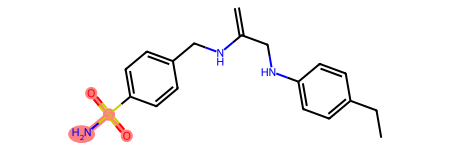

In [57]:
f = 122
s = 8
print(str(sub_predictions[f]))
mols[f][1]

In [321]:
original_predictions[122]

0.9771654

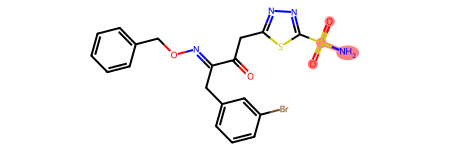

In [ ]:
s=1

In [ ]:
substructure_of_interest

In [ ]:
with open('carbonic_hetero_sub_score_data.pickle', 'wb') as handle:
    pickle.dump([original_predictions, sub_predictions], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
len(mols)

In [ ]:
ti = bdb_class_to_indices["ACC2"]

In [ ]:
mols[ti[20]]